Project: Investigating Netflix Movies

Importing required libraries and csv file for project

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt

netflix = pd.read_csv('netflix_titles.csv')
netflix.columns = netflix.columns.str.strip().str.replace(' " ',' ').str.replace(' ',' ')
print(netflix.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64


Most frequent time duration of movies from 1990s

In [3]:
# subsetting the show types into movies
movies = netflix[netflix['type'] == 'Movie']



movies_90s = movies[(movies['release_year'] >= 1990) & (movies['release_year'] <= 1999)].copy()



# Check if duration column is string type
if movies_90s['duration'].dtype == 'object':
    # Clean string durations like "90 min"
    movies_90s['duration_cleaned'] = movies_90s['duration'].str.replace(' min', '').astype(float)
else:
    # Already numeric (float or int), no need to clean
    movies_90s['duration_cleaned'] = movies_90s['duration']



most_frequent_duration = int(movies_90s['duration_cleaned'].mode()[0])

print(f"The most frequent duration of movies in 1990s is {most_frequent_duration} minutes")

The most frequent duration of movies in 1990s is 94 minutes


Plotting the result

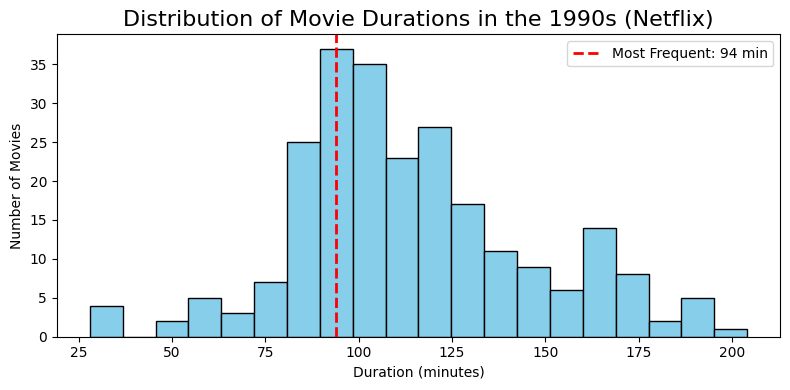

In [4]:
plt.figure(figsize=(8,4))
plt.hist(movies_90s['duration_cleaned'], bins=20, color='skyblue', edgecolor='black')
# Draw a vertical line at the most frequent duration
plt.axvline(most_frequent_duration, color='red', linestyle='--', linewidth=2, label=f'Most Frequent: {most_frequent_duration} min')
plt.title('Distribution of Movie Durations in the 1990s (Netflix)', fontsize=16)
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.legend()
plt.tight_layout()
plt.show()
